# Analisis sobre videojuegos

### Carga de datos

In [25]:
import pandas as pd

basics = pd.read_csv("title.basics.tsv", sep = "\t")
ratings = pd.read_csv("title.ratings.tsv", sep = "\t") 

videojuegos = basics[basics["titleType"] == "videoGame"].copy()


videojuegos.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
82526,tt0084376,videoGame,"MysteryDisc: Murder, Anyone?","MysteryDisc: Murder, Anyone?",0,1982,\N,\N,"Adventure,Crime,Mystery"
84081,tt0085982,videoGame,MysteryDisc: Many Roads to Murder,MysteryDisc: Many Roads to Murder,0,1983,\N,\N,"Adventure,Crime,Mystery"
102636,tt0105000,videoGame,Night Trap,Night Trap,0,1992,\N,\N,"Adventure,Horror,Mystery"
107360,tt0109865,videoGame,Gabriel Knight: Sins of the Fathers,Gabriel Knight: Sins of the Fathers,0,1993,\N,\N,"Adventure,Drama,Horror"
107752,tt0110267,videoGame,King's Quest VII: The Princeless Bride,King's Quest VII: The Princeless Bride,0,1994,\N,\N,"Adventure,Fantasy"


### Union de dataframes

In [59]:
df = videojuegos.merge(ratings, on = "tconst", how = "left")

df.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0084376,videoGame,"MysteryDisc: Murder, Anyone?","MysteryDisc: Murder, Anyone?",0,1982,\N,\N,"Adventure,Crime,Mystery",5.8,42.0
1,tt0085982,videoGame,MysteryDisc: Many Roads to Murder,MysteryDisc: Many Roads to Murder,0,1983,\N,\N,"Adventure,Crime,Mystery",NaN,NaN
2,tt0105000,videoGame,Night Trap,Night Trap,0,1992,\N,\N,"Adventure,Horror,Mystery",6.2,434.0
3,tt0109865,videoGame,Gabriel Knight: Sins of the Fathers,Gabriel Knight: Sins of the Fathers,0,1993,\N,\N,"Adventure,Drama,Horror",8.9,820.0
4,tt0110267,videoGame,King's Quest VII: The Princeless Bride,King's Quest VII: The Princeless Bride,0,1994,\N,\N,"Adventure,Fantasy",7.6,229.0


### Limpieza básica

In [ ]:
#Eliminar duplicados
df = df.drop_duplicates()

# "Eliminar nulos"
df = df[df["startYear"] != "\\N"]
df = df[df["genres"] != "\\N"]

df = df.dropna(subset = ["averageRating"])
df = df.dropna(subset = ["genres"])

df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0084376,videoGame,"MysteryDisc: Murder, Anyone?","MysteryDisc: Murder, Anyone?",0,1982,\N,\N,"Adventure,Crime,Mystery",5.8,42.0
2,tt0105000,videoGame,Night Trap,Night Trap,0,1992,\N,\N,"Adventure,Horror,Mystery",6.2,434.0
3,tt0109865,videoGame,Gabriel Knight: Sins of the Fathers,Gabriel Knight: Sins of the Fathers,0,1993,\N,\N,"Adventure,Drama,Horror",8.9,820.0
4,tt0110267,videoGame,King's Quest VII: The Princeless Bride,King's Quest VII: The Princeless Bride,0,1994,\N,\N,"Adventure,Fantasy",7.6,229.0
5,tt0110714,videoGame,Off-World Interceptor,Off-World Interceptor,0,1994,\N,\N,"Action,Comedy,Sci-Fi",3.7,11.0


### Promedio por año

In [ ]:
ratings_anuales = df.groupby("startYear")["averageRating"].mean()

ratings_anuales.head()

startYear
2022    6.751168
2023    6.867573
2024    6.940257
2025    7.049845
2026    6.462500
Name: averageRating, dtype: float64

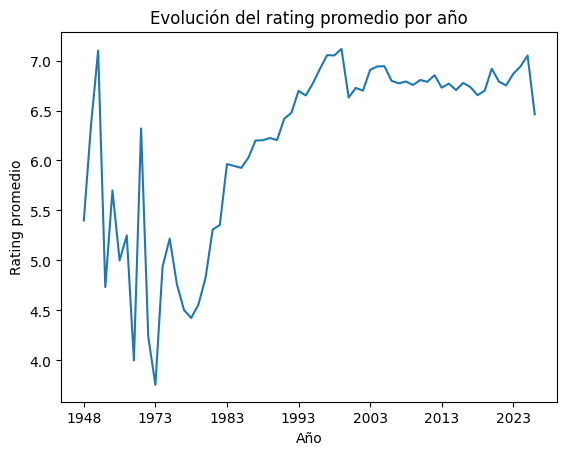

In [ ]:
import matplotlib.pyplot as plt

ratings_anuales.plot()
plt.xlabel("Año")
plt.ylabel("Rating promedio")
plt.title("Evolución del rating promedio por año")
plt.show()    

Los ratings presentan alta variabilidad en las primeras décadas debido al bajo volumen de registros. A partir de los años 70 se observa un crecimiento sostenido en la calidad percibida, coincidiendo con la expansión de la industria. Desde el 2000, los ratings se estabilizan, lo que sugiere madurez del sector y estándares de calidad más consistentes.

### Análisis por genero

In [119]:
#"Expandir generos para analisis por genero unicamente"
df_generos = df.copy()
df_generos["genres"] = df_generos["genres"].str.split(",")
df_generos = df_generos.explode(["genres"])

df_generos.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0084376,videoGame,"MysteryDisc: Murder, Anyone?","MysteryDisc: Murder, Anyone?",0,1982,\N,\N,Adventure,5.8,42.0
0,tt0084376,videoGame,"MysteryDisc: Murder, Anyone?","MysteryDisc: Murder, Anyone?",0,1982,\N,\N,Crime,5.8,42.0
0,tt0084376,videoGame,"MysteryDisc: Murder, Anyone?","MysteryDisc: Murder, Anyone?",0,1982,\N,\N,Mystery,5.8,42.0
2,tt0105000,videoGame,Night Trap,Night Trap,0,1992,\N,\N,Adventure,6.2,434.0
2,tt0105000,videoGame,Night Trap,Night Trap,0,1992,\N,\N,Horror,6.2,434.0


In [138]:
ratings_generos = df_generos.groupby("genres").agg(Promedio = ("averageRating", "mean"), Cantidad = ("averageRating", "count")).sort_values(by = "Promedio", ascending = False)

ratings_generos = ratings_generos[ratings_generos["Cantidad"] > 50]

ratings_generos.head()

,Promedio,Cantidad
genres,,
Drama,7.487977,865
Mystery,7.141818,880
Crime,7.073082,795
Adventure,6.952898,8953
Comedy,6.952746,1657


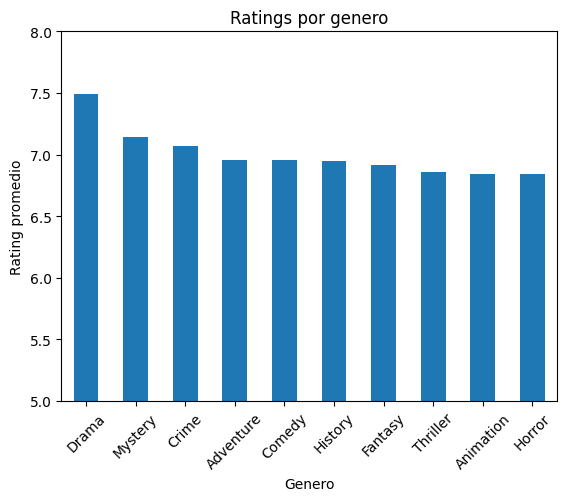

In [ ]:
ratings_generos.Promedio.head(10).plot(kind = "bar")
plt.xlabel("Genero")
plt.ylabel("Rating promedio")
plt.title("Ratings por genero")
plt.ylim(5,8)
plt.xticks(rotation = 45)  
plt.show()


Los videojuegos con elementos dramáticos presentan los ratings promedio más altos. Esto sugiere que las experiencias narrativas profundas y centradas en personajes generan mayor valoración por parte de los usuarios.

### Juegos por años

In [ ]:
juegos_por_año = df.groupby("startYear")["tconst"].count().sort_index(ascending = False)

juegos_por_año.head()

startYear
2026      8
2025    323
2024    467
2023    478
2022    471
Name: tconst, dtype: int64

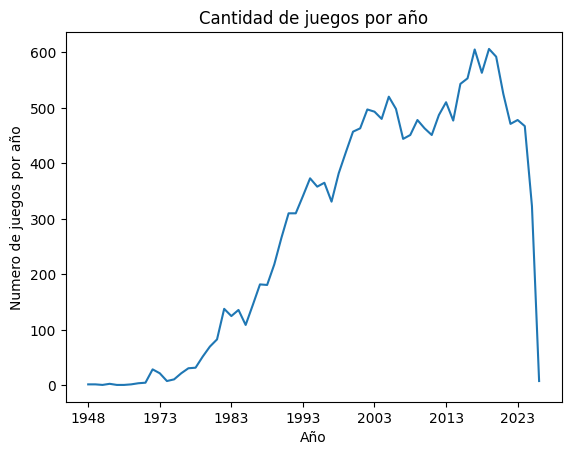

In [144]:
juegos_por_año.plot()
plt.xlabel("Año")
plt.ylabel("Numero de juegos por año")
plt.title("Cantidad de juegos por año")
plt.show()    

La producción de videojuegos muestra un crecimiento significativo a partir de los años 80, coincidiendo con la popularización de consolas domésticas. El crecimiento se acelera en los 90 con avances tecnológicos y alcanza su mayor expansión después de 2005, impulsado por la distribución digital y el desarrollo independiente

### ¿Mas producción igual a menos calidad?

In [156]:
comparativa = ratings_anuales.to_frame().join(juegos_por_año.to_frame(name = "cantidadJuegos"))

comparativa = comparativa[comparativa["cantidadJuegos"] > 50]

comparativa.head()

,averageRating,cantidadJuegos
startYear,,
1979,4.555769,52
1980,4.822857,70
1981,5.308434,83
1982,5.355072,138
1983,5.964000,125


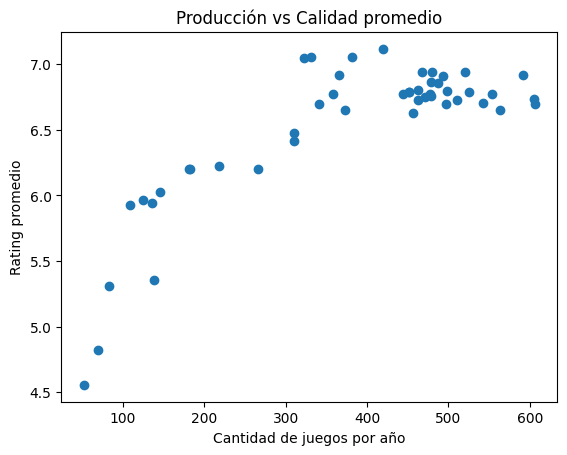

In [157]:
plt.figure()
plt.scatter(comparativa["cantidadJuegos"], comparativa["averageRating"])
plt.xlabel("Cantidad de juegos por año")
plt.ylabel("Rating promedio")
plt.title("Producción vs Calidad promedio")
plt.show()

In [158]:
comparativa.corr()

,averageRating,cantidadJuegos
averageRating,1.000000,0.807845
cantidadJuegos,0.807845,1.000000


Se observó una correlación positiva (0.77) entre el volumen anual de lanzamientos y el rating promedio. Esto sugiere que el crecimiento de la industria ha estado acompañado por mejoras en los estándares de calidad, posiblemente impulsadas por avances tecnológicos, profesionalización del desarrollo y mayor competencia.